## <center> Ajuste de Distribuciones </center>
En el ámbito de la simulación, el ajuste de distribuciones probabilísticas es una tarea esencial para modelar la incertidumbre y variabilidad de los sistemas reales. Las distribuciones ajustadas permiten representar los patrones de comportamiento observados en los datos, lo cual es fundamental para obtener simulaciones confiables y útiles.

### 1. Independencia
La mayoría de los métodos para especificar distribuciones de entrada suponen que los datos observados $X_1, X_2, \dots, X_n$ son una muestra independiente (aleatoria) de alguna distribución subyacente. De lo contrario, la mayoría de los métodos son independientes. A continuación veremos algunos métodos heurísticos para evaluar la independencia.

#### 1.1 Gráfico de Correlación
Si los datos se observan en una secuencia de tiempo, calcule la correlación muestral $\hat{\rho}_j$ y grafiquelo como una función del rezago $j$. Si los datos son independientes, las correlaciones deberían ser cercanas a cero para todos los rezagos. Tenga en cuenta que se trata de meras estimaciones.

Veamos un ejemplo:


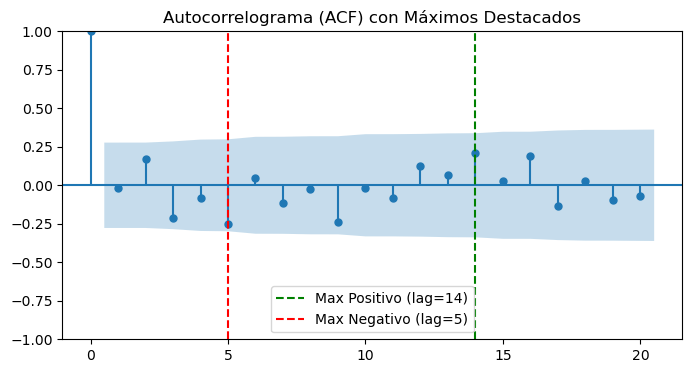

Máxima correlación positiva en lag 14: 0.2064
Máxima correlación negativa en lag 5: -0.2541


In [37]:
# Librerias necesarias
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Cargar datos
data = pd.read_excel('Datos1.xlsx')

# Crear variables
datos = data['Datos']

# Calcular autocorrelaciones
acf_values = sm.tsa.acf(data['Datos'], nlags=20)

# Encontrar la máxima correlación positiva y negativa (excluyendo el rezago 0)
lags = np.arange(1, len(acf_values))  # Omitimos el rezago 0 porque siempre es 1
max_positive_lag = lags[np.argmax(acf_values[1:])]
max_negative_lag = lags[np.argmin(acf_values[1:])]

# Gráfico de correlación
fig, ax = plt.subplots(figsize=(8, 4))
sm.graphics.tsa.plot_acf(datos, lags=20, ax=ax)

# Resaltar máximos
ax.axvline(x=max_positive_lag, color='green', linestyle='--', label=f'Max Positivo (lag={max_positive_lag})')
ax.axvline(x=max_negative_lag, color='red', linestyle='--', label=f'Max Negativo (lag={max_negative_lag})')

plt.title("Autocorrelograma (ACF) con Máximos Destacados")
plt.legend()
plt.show()

# Mostrar valores
print(f"Máxima correlación positiva en lag {max_positive_lag}: {acf_values[max_positive_lag]:.4f}")
print(f"Máxima correlación negativa en lag {max_negative_lag}: {acf_values[max_negative_lag]:.4f}")

#### 1.2 Diagrama de Dispersión
Graficar los pares $(X_i,X_{i+1})$. Si los datos son independientes, los pares deben estar dispersos aleatoriamente.

Si los datos están correlacionados positivamente (negativamente), los pares se ubicarán a lo largo de una línea recta con pendiente positiva (negativa).

Tenga en cuenta que el diagrama de dispersión puede exhibir otro tipo de dependencia (por ejemplo, una dependencia no lienal).

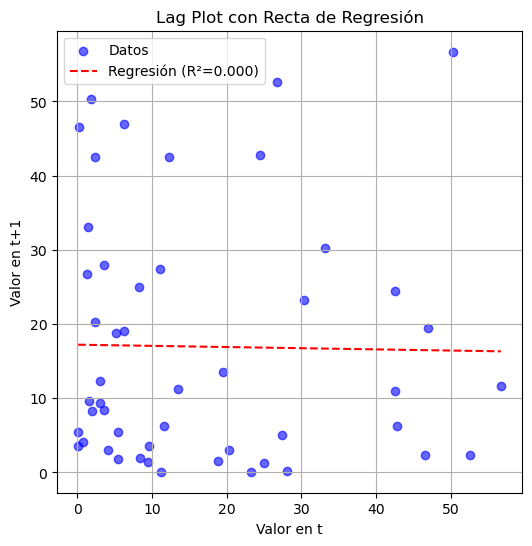

Ecuación de la recta: Y = -0.02X + 17.22
Coeficiente de correlación R: -0.016
R² (Varianza explicada): 0.000


In [11]:
from scipy.stats import linregress
x=datos[:-1] # valores actuales
y=datos[1:] # valores rezagados

# Calcular regresión lineal
slope, intercept, r_value, _, _ = linregress(x, y)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = slope * x_fit + intercept

# Gráfico con la recta de regresión
plt.figure(figsize=(6, 6))
plt.scatter(x, y, alpha=0.6, color='blue', label='Datos')
plt.plot(x_fit, y_fit, color='red', linestyle="--", label=f"Regresión (R²={r_value**2:.3f})")

plt.title("Lag Plot con Recta de Regresión")
plt.xlabel("Valor en t")
plt.ylabel("Valor en t+1")
plt.legend()
plt.grid(True)

plt.show()

# Mostrar ecuación de la recta
print(f"Ecuación de la recta: Y = {slope:.2f}X + {intercept:.2f}")
print(f"Coeficiente de correlación R: {r_value:.3f}")
print(f"R² (Varianza explicada): {r_value**2:.3f}")


### 2. Seleccionar una Familía de Distribuciones
El primer paso para seleccionar una distribución es decidir que familias generales (por ejemplo, exponencial, normal o Poisson) parecen ser apropiadas en función de sus formas.

A continuación veremos varias heurísticas o pautas que se pueden usar para ayudar a elegir familias de distribuciones adecuadas.

#### 2.1 Resumen de Estadísticas
- Compare estadísticas muestrales simples con versiones poblacionales teóricas para algunas distribuciones para obtener una pista. Tenga en cuenta que solo obtenemos estimaciones sujetas a incertidumbre.
- Si la media muestral $\overline{X}(n)$ y la mediana muestral $\hat{x}_{0.5}(n)$ están cerca, sugiere una distribución simétrica.
- *Coeficiente de variación* de una distribución: $\text{cv} = \frac{\sigma}{\mu}$; estimado mediante $\hat{\text{cv}} = \frac{S(n)}{\overline{X}(n)}$ a veces es útil para discriminar entre distribuciones continuas
    - si $\text{cv} < 1$ sugiere gamma o Weibull con parámetro de forma $\alpha < 1$
    - si $\text{cv} = 1$ sugiere exponencial
    - si $\text{cv} > 1$ sugiere gamma o Weibull con parámetro de forma $\alpha > 1$
- *Radio lexis* de una distribución: $\tau = \frac{\sigma^2}{\mu}$; estimado mediante $\hat{\tau} = \frac{S^2(n)}{\overline{X}(n)}$ a veces es útil para discriminar entre distribuciones discretas.
    - si $\tau < 1$ sugiere binomial
    - si $\tau = 1$ sugiere Poisson
    - si $\tau > 1$ sugiere binomial negativa o geométrica
- Otras estadísticas incluyen: rango, asimetría, curtosis









In [15]:
from scipy import stats
# Podemos hacer un resumen estadístico básico con NumPy
resumennp = {
    "Cuenta": np.size(datos),
    "Mínimo": np.min(datos),
    "Máximo": np.max(datos),
    "Media": np.mean(datos),
    "Mediana": np.median(datos),
    # "Moda": stats.mode(datos),
    "Desviación estándar": np.std(datos,ddof=1),
    "Varianza": np.var(datos,ddof=1),
    "Asimetría": stats.skew(datos),
    "Curtosis": stats.kurtosis(datos),
    "Coeficiente de variación": np.std(datos,ddof=1) / np.mean(datos),
    "Rango": np.ptp(datos),
    "Percentil 25": np.percentile(datos, 25),
    "Percentil 50": np.percentile(datos, 50),
    "Percentil 75": np.percentile(datos, 75)
}

# Mostrar el resumen estadístico

for clave, valor in resumennp.items():
    print(f'{clave}: {valor:.2f}')

Cuenta: 50.00
Mínimo: 0.10
Máximo: 56.70
Media: 16.63
Mediana: 10.30
Desviación estándar: 16.48
Varianza: 271.63
Asimetría: 0.96
Curtosis: -0.30
Coeficiente de variación: 0.99
Rango: 56.60
Percentil 25: 3.12
Percentil 50: 10.30
Percentil 75: 26.27


#### 2.2 Histogramas
##### 2.2.1 Datos continuos
- Básicamente, una estimación insesgada de $\Delta b \, f(x)$, donde $f(x)$ es la verdadera densidad subyacente (desconocida) de los datos observados y $\Delta b$ es una constante.
- Dividir el rango de datos en $k$ intervalos de ancho $\Delta b$ cada uno
- $k, \Delta b$ sonbásicamente determinados por ensayo y error
- Una regla general, *Regla de Sturges*: $k = \lfloor 1 + \log_2 n \rfloor = \lfloor 1 + 3.332 \log_{10} n \rfloor$
- Calcular la proporción $h_j$ de datos que caen en el intervalo $j$-ésimo; trazar una constante de altura $h_j$ por encima del intervalo $j$-ésimo
- La forma del gráfico debe parecerse a la densidad de la distribución subyacente; compare la forma del histograma con las formas de densidades conocidas

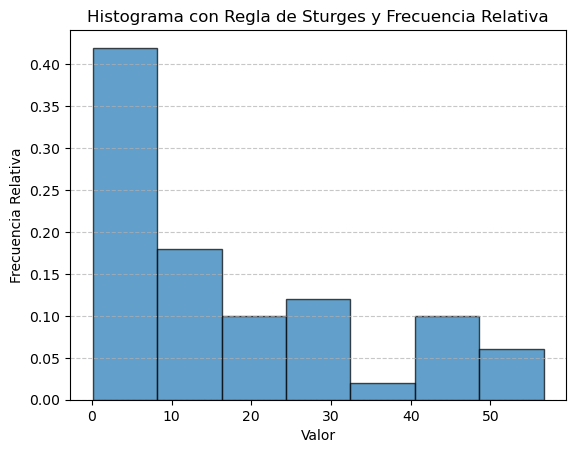

In [32]:
# Calcular el número de bins con la regla de Sturges
N = len(datos)  # Cantidad de datos
k_sturges = int(round(1 + np.log2(N), 0))  # Número de bins

# Graficar histograma con regla de Sturges y frecuencia relativa
plt.hist(datos, bins=k_sturges, edgecolor="black", alpha=0.7, weights=np.ones(len(datos)) / len(datos))

# Personalización del gráfico
plt.title("Histograma con Regla de Sturges y Frecuencia Relativa")
plt.xlabel("Valor")
plt.ylabel("Frecuencia Relativa")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### 2.2 Datos discretos
- Básicamente, una estimación insesgada de la función de masa de probabilidad subyacente (desconocida) de los datos.
- Para cada valor posible $x_j$ que se pueda asumir por los datos, sea $h_j$ la proporción de los datos que son iguales a $x_j$; trace una barra de altura $h_j$ sobre $x_j$
- La forma del gráfico debe parecerse a la función de masa de la distribución subyacente; compare la forma del histograma con las formas de la función de masa de las distribuciones teóricas

<BarContainer object of 8 artists>

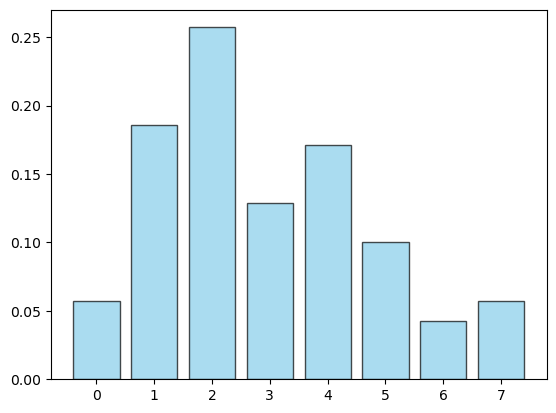

In [36]:
# Cargar los datos
datad = pd.read_excel('discretos.xlsx')

# Crear variables
datosd = datad['Valor']

# Obtener la distribución de frecuencias
valores, conteos = np.unique(datosd, return_counts=True)

# Calcular las probabilidades empíricas de cada valor
probabilidades = conteos / len(datosd)

# Graficar el histograma de frecuencias relativas
plt.bar(valores, probabilidades, color='skyblue', edgecolor='black', alpha=0.7)



### 3. Estimación de parámetros
Para estimar los parámetros de una distribución por Máxima Verosimilitud (MLE) en Python a partir de un conjunto de datos, podemos usar la librería `scipy.stats`.

In [47]:
params = stats.expon.fit(datos, floc=0)
print(*params)

0.0 16.632


### 4. Pruebas de bondad de ajuste
#### 4.1 Prueba Kolmogorov-Smirnov

In [68]:
print("Prueba Kolmogorov-Smirnov")
ks_stat, p_value = stats.kstest(datos, stats.expon.cdf, args=params)
print(params)
print(ks_stat)
print(p_value)



Prueba Kolmogorov-Smirnov
(0.0, 16.632)
0.10537262823300159
0.5981417101056801


#### 4.2 Prueba Anderson Darling

In [70]:
print("Prueba Anderson-Darling:")
stat, critical_values, significance_levels = stats.anderson(datos, 'expon')
print("A2 Statistic:", stat)
print("Critical Values:", critical_values)
print("Significance Levels:", significance_levels)

Prueba Anderson-Darling:
A2 Statistic: 1.022719162750434
Critical Values: [0.911 1.065 1.325 1.587 1.934]
Significance Levels: [15.  10.   5.   2.5  1. ]


### 5. Visualización del ajuste

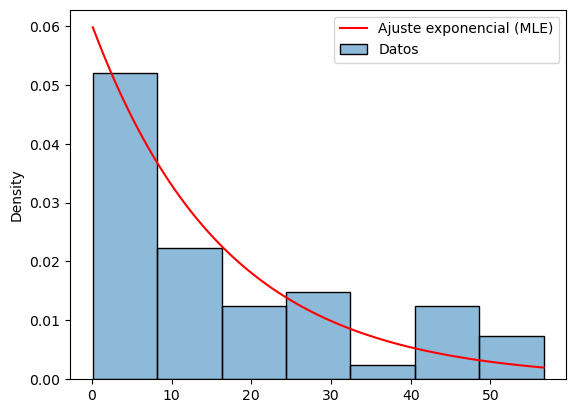

In [71]:
# Histogram of data
sns.histplot(data, bins="sturges", kde=False, color='blue', stat='density', label='Datos')

# Curva de la distribución exponencial ajustada
x = np.linspace(min(datos), max(datos), 100)
pdf_fitted = stats.expon.pdf(x,*params)

plt.plot(x, pdf_fitted, 'r-', label="Ajuste exponencial (MLE)")
plt.legend()
plt.show()

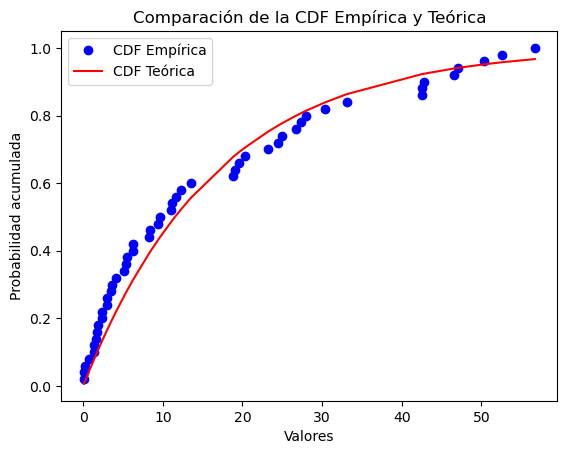

In [72]:
# Obtener la CDF empírica
ecdf = np.sort(datos)
prob_empirical = np.arange(1, len(ecdf) + 1) / len(ecdf)

# Obtener la CDF teórica ajustada
cdf_fitted = stats.expon.cdf(ecdf, *params)

# Graficar la CDF empírica vs teórica
plt.plot(ecdf, prob_empirical, marker="o", linestyle="none", label="CDF Empírica", color="blue")
plt.plot(ecdf, cdf_fitted, linestyle="-", label="CDF Teórica", color="red")

plt.legend()
plt.title("Comparación de la CDF Empírica y Teórica")
plt.xlabel("Valores")
plt.ylabel("Probabilidad acumulada")
plt.show()

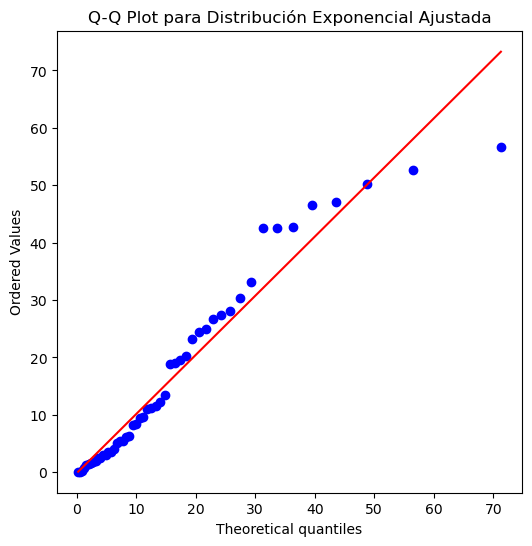

In [76]:
# Q-Q Plot para distribución exponencial
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(datos, dist="expon", sparams=params, plot=ax)
ax.get_lines()[1].set_color('red')
plt.title("Q-Q Plot para Distribución Exponencial Ajustada")
plt.show()

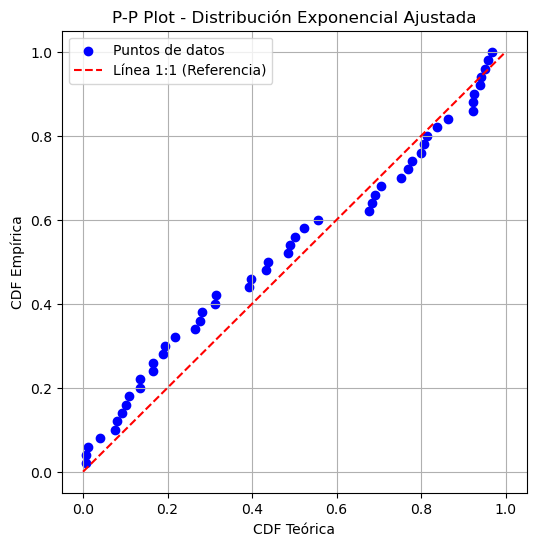

In [77]:
# Ordenar los datos para calcular la CDF empírica
sorted_datos = np.sort(datos)
emp_cdf = np.arange(1, len(datos) + 1) / len(datos)  # CDF empírica

# Calcular la CDF teórica ajustada
theo_cdf = stats.expon.cdf(sorted_datos, *params)

# Graficar el P-P Plot
plt.figure(figsize=(6,6))
plt.scatter(theo_cdf, emp_cdf, label="Puntos de datos", color="blue")
plt.plot([0, 1], [0, 1], 'r--', label="Línea 1:1 (Referencia)")
    
plt.xlabel("CDF Teórica")
plt.ylabel("CDF Empírica")
plt.title(f"P-P Plot - Distribución Exponencial Ajustada")
plt.legend()
plt.grid(True)
plt.show()